In [1]:
using PyPlot
using JLD
#acuerdate: no quieres svg interpolados
matplotlib[:rcParams][:"svg.image_noscale"]=false

false

In [2]:
CSD=load("CSDEvocada.jld", "CSD")
CSDPlanchado=load("CSDEvocada.jld", "CSDPlanchada")
CSDPromedio=CSD["Trancazo_1"]+CSD["Trancazo_2"]+CSD["Trancazo_3"]
CSDPlanchadoPromedio=CSDPlanchado["Trancazo_1"]+CSDPlanchado["Trancazo_2"]+CSDPlanchado["Trancazo_3"];

In [3]:
#Las esquinas del cuadro
xizq=28
xder=42
ybajo=10
yalto=24

24

In [4]:
CatenarioPositivo=load("Catenarios4AP-Promedio-3.jld", "CatenarioPositivo")
CatenarioNegativo=load("Catenarios4AP-Promedio-3.jld", "CatenarioNegativo");

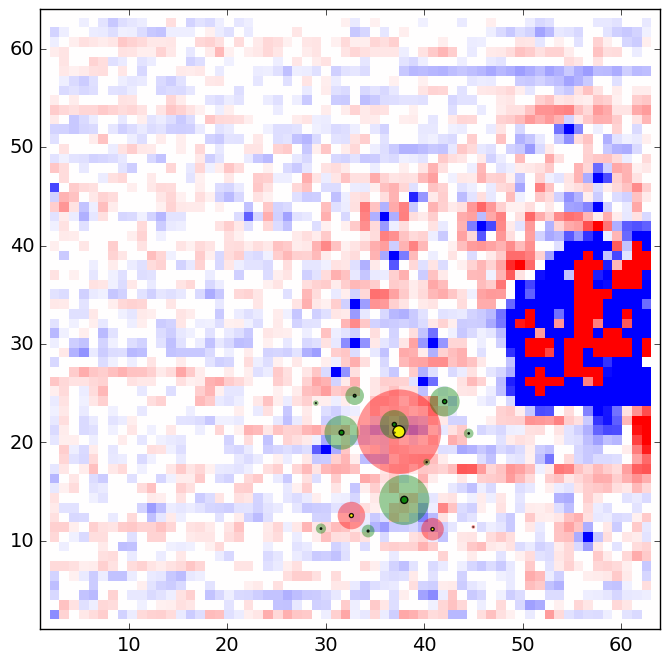

false

In [33]:
cuadro=50

CSDEjemplo=CSDPromedio[:,:,cuadro];
map!(x->abs(x)<10? 0:x, CSDEjemplo)

PyPlot.ion()
#################
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>16)
seg=round((cuadro-35)/7022, 1)
titulo="$seg ms"
figure(figsize=(8,8))
PyPlot.xlim(1,64)
PyPlot.ylim(1,64)
limcsd=180

otraimagen=imshow(CSDEjemplo, cmap="bwr", origin="lower", vmin=-limcsd, vmax=limcsd, 
interpolation="nearest", extent=[1,64,1,64])

#cb=colorbar(otraimagen)
#cb=colorbar(otraimagen, ticks=[-150, +150],fraction=0.046, pad=0.04, use_gridspace='True')
#cb=colorbar(otraimagen, ticks=[-150, +150], use_gridspec="True")
#farofa=cb[:set_ticklabels]([{"Sink"}, {"Source"}])
#xlabel("furufu", fontdict=font1)

EjemploCentrosCSDPos=readdlm("CenterOfMassCollector/CMFuentes-$cuadro.dat")
xxpos=EjemploCentrosCSDPos[:,1]+xizq
yypos=EjemploCentrosCSDPos[:,2]+ybajo
valorpos=EjemploCentrosCSDPos[:,3]
EjemploCentrosCSDNeg=readdlm("CenterOfMassCollector//CMPozos-$cuadro.dat")
xxneg=EjemploCentrosCSDNeg[:,1]+xizq
yyneg=EjemploCentrosCSDNeg[:,2]+ybajo
valorneg=EjemploCentrosCSDNeg[:,3];

scatter(xxpos,yypos, s=valorpos, alpha=0.4, c="r", edgecolors="none")
scatter(xxneg, yyneg, s=abs(valorneg), alpha=0.4, c="g", edgecolors="none")

scatter(xxpos,yypos, s=0.02*valorpos, alpha=0.9, c="yellow", edgecolors="black")
scatter(xxneg, yyneg,s=0.02*abs(valorneg), alpha=0.9, c="green", edgecolors="black")

tick_params(axis="both", labelsize=14)

#title(titulo, fontdict=font1)
 #tight_layout()
#savefig("CSDParaDisjoint-$cuadro.svg", dpi=90)
PyPlot.close_queued_figs()